In [1]:
import neural_net_without_autograd as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  GridSearchCV, KFold, train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

Loading in the dataset and splitting the data:

In [2]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

### Scores

In [3]:
# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [100, 2]
activations = ['sigmoid', 'softmax']

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epsilon=0.1, batch_size=10, epochs=500, llambda=0.001))
])

# getting data for confusion matrix
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_proba(X_test)

# Evauluate the model
accuracy = pipeline.score(X_train, y_train)
print(f'Train accuracy: {accuracy:.4f}')

accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 0: Accuracy = 0.8879120879120879
Epoch 100: Accuracy = 0.9472527472527472
Epoch 200: Accuracy = 0.9824175824175824
Epoch 300: Accuracy = 0.9824175824175824
Epoch 400: Accuracy = 0.9846153846153847
Train accuracy: 0.9890
Test accuracy: 0.9737


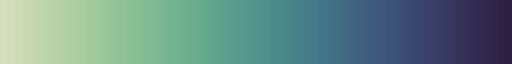

In [14]:
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

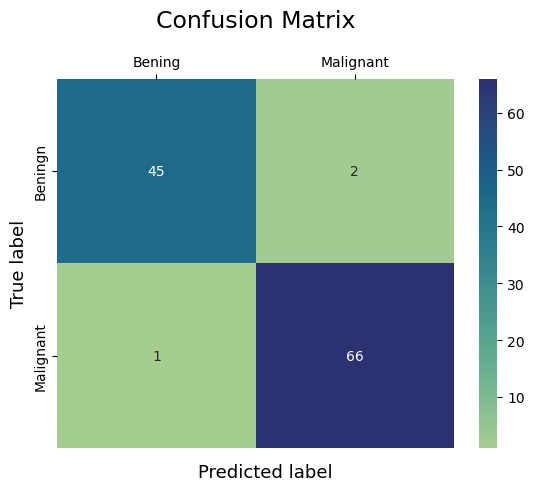

In [43]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, -1))

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'],
            cmap='crest')
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()


### Gridsearch

#### One hidden layer

In [18]:
k_folds = KFold(n_splits=5)

# Define layer sizes and activations
network_input_size =  30
#layer_output_sizes = [50, 2]
#activations = ['relu', 'softmax']

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=500))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
    'model__activations': [['sigmoid', 'softmax'], ['relu', 'softmax'], ['elu', 'softmax']],
    'model__n_hidden': [[25, 2], [50, 2], [100, 2]]
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=3,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Epoch 0: Accuracy = 0.6483516483516484
Epoch 100: Accuracy = 0.8901098901098901
Epoch 200: Accuracy = 0.9258241758241759
Epoch 300: Accuracy = 0.9423076923076923
Epoch 400: Accuracy = 0.9532967032967034
[CV 1/5] END model__activations=['sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 2];, score=0.890 total time=   2.1s
Epoch 0: Accuracy = 0.4340659340659341
Epoch 100: Accuracy = 0.8021978021978022
Epoch 200: Accuracy = 0.9038461538461539
Epoch 300: Accuracy = 0.9230769230769231
Epoch 400: Accuracy = 0.9313186813186813
[CV 2/5] END model__activations=['sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 2];, score=0.956 total time=   2.1s
Epoch 0: Accuracy = 0.6401098901098901
Epoch 100: Accuracy = 0.8956043956043956
Epoch 200: Accuracy = 0.9010989010989011
Epoch 300: Accuracy = 0.9175824175824175
Epoch 400: Accuracy = 0.9258241758241759
[CV 3/5] END model__

Optimal parameters: {'model__activations': ['sigmoid', 'softmax'], 'model__epsilon': 0.01, 'model__llambda': 0.01, 'model__n_hidden': [100, 2]}

In [20]:
cv_results = grid_search.cv_results_

results_df = pd.DataFrame(cv_results)

# save data to csv-file
results_df.to_csv('Results/gridsearch_wisconsin_500_epochs.csv', sep=',', encoding='utf-8')

#### Two layers

In [8]:
k_folds = KFold(n_splits=5)
layer_output_sizes = [8, 8, 3]
activations = ['sigmoid', 'sigmoid', 'softmax']

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=50))
])

param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
    'model__activations': [['sigmoid', 'sigmoid', 'softmax'], ['relu', 'relu', 'softmax'], ['elu', 'elu', 'softmax']],
    'model__n_hidden': [[25, 25, 2], [50, 50, 2], [100, 100, 2]]
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=3,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Epoch 0: Accuracy = 0.6263736263736264
[CV 1/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=0.736 total time=   0.2s
Epoch 0: Accuracy = 0.3708791208791209
[CV 2/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=0.648 total time=   0.2s
Epoch 0: Accuracy = 0.6401098901098901
[CV 3/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=0.538 total time=   0.2s
Epoch 0: Accuracy = 0.3543956043956044
[CV 4/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=0.879 total time=   0.2s
Epoch 0: Accuracy = 0.7774725274725275
[CV 5/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'],

Optimal parameters: {'model__activations': ['elu', 'elu', 'softmax'], 'model__epsilon': 0.1, 'model__llambda': 0.0001, 'model__n_hidden': [50, 50, 2]}

In [15]:
cv_results = grid_search.cv_results_

results_df = pd.DataFrame(cv_results)

# save data to csv-file
results_df.to_csv('Results/gridsearch_wisconsin_two_layers_50_epochs.csv', sep=',', encoding='utf-8')

### Learning rate

In [4]:
N = 500
learning_rates = np.logspace(-4, -1, N)
scores = np.zeros(N)
network_input_size = 30
layer_output_sizes = [50, 2]
activations = ['sigmoid', 'softmax']

for idx, lr in enumerate(learning_rates):
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epochs=10, epsilon=lr))
    ])

    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)

    scores[idx] = score

Epoch 0: Accuracy = 0.35824175824175825
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.367032967032967
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.35604395604395606
Epoch 0: Accuracy = 0.3362637362637363
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.37142857142857144
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.5934065934065934
Epoch 0: Accuracy = 0.4747252747252747
Epoch 0: Accuracy = 0.3648351648351648
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.35824175824175825
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.4989010989010989
Epoch 0: Accuracy = 0.8087912087912088
Epoch 0: Accuracy = 0.6351648351648351
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.

In [5]:
np.save('Results/Own_code_scores_lr.npy', scores)
np.save('Results/learning_rates_comparison.npy', learning_rates)

### Batch Size

In [6]:
N = 500
learning_rates = np.logspace(-4, -1, N)
batch_sizes = [10, 20, 50, 100, 200]
scores = np.zeros((len(batch_sizes), N))
network_input_size = 30
layer_output_sizes = [50, 2]
activations = ['sigmoid', 'softmax']

for idy, batch_size in enumerate(batch_sizes):  
    for idx, lr in enumerate(learning_rates):
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epochs=10, epsilon=lr, batch_size=batch_size))
        ])

        pipeline.fit(X_train, y_train)
        score = pipeline.score(X_test, y_test)

        scores[idy, idx] = score

Epoch 0: Accuracy = 0.6637362637362637
Epoch 0: Accuracy = 0.36043956043956044
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.6615384615384615
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.6857142857142857
Epoch 0: Accuracy = 0.5626373626373626
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.3516483516483517
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.3648351648351648
Epoch 0: Accuracy = 0.756043956043956
Epoch 0: Accuracy = 0.17582417582417584
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.35824175824175825
Epoch 0: Accuracy = 0.5736263736263736
Epoch 0: Accuracy = 0.35824175824175825
Epoch 0: Accuracy = 0.3626373626373626
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.6087912087912087
Epoch 0: Accuracy = 0.6395604395604395
Epoch 0: Accuracy = 0.6373626373626373
Epoch 0: Accuracy = 0.

In [8]:
np.save('Results/Own_code_scores_batch_size.npy', scores)